Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.

Deliverables:

Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.

Additional Information:

You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.

## Answers

In [9]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=15b690e92df99475b1b74a155a5b362e048b8b7359ab4886370a85c6f39c3977
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/78/0e/8e5e2b500f83a682c8d7e7ce820638cf99faa894a662f71cf0
Successfully built wget


   Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

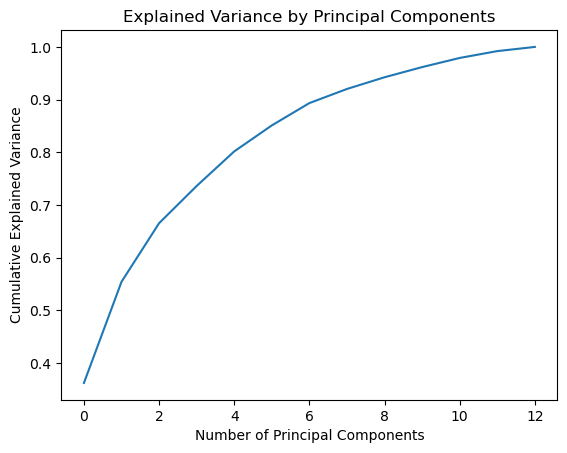

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


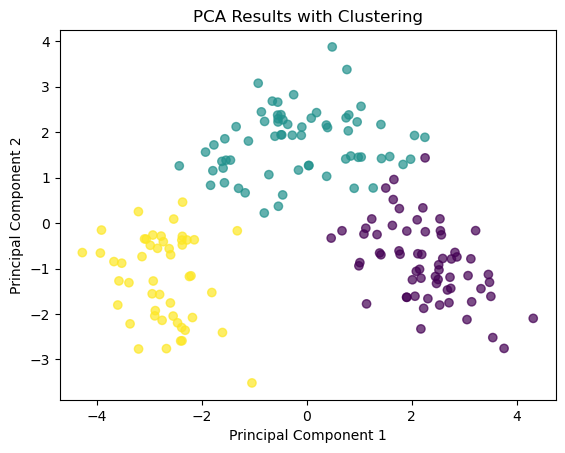

Silhouette Score: 0.5610505693103246


In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import wget

wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wget.download(wine_url, "wine_data.csv")

column_names = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium", "Total Phenols",
                "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins", "Color Intensity", "Hue",
                "OD280/OD315 of diluted wines", "Proline"]
data = pd.read_csv("wine_data.csv", header=None, names=column_names)

print(data.head())
print(data.info())

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:])

pca = PCA()
pca_result = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_explained_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.show()

n_components = 2  
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(pca_result)

plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Results with Clustering")
plt.show()

silhouette_avg = silhouette_score(pca_result, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")